In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
data = pd.read_csv('/content/Social_Network_Ads.csv')

In [32]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [33]:
data.shape

(400, 5)

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [35]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [36]:
# checking for missing values
data.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

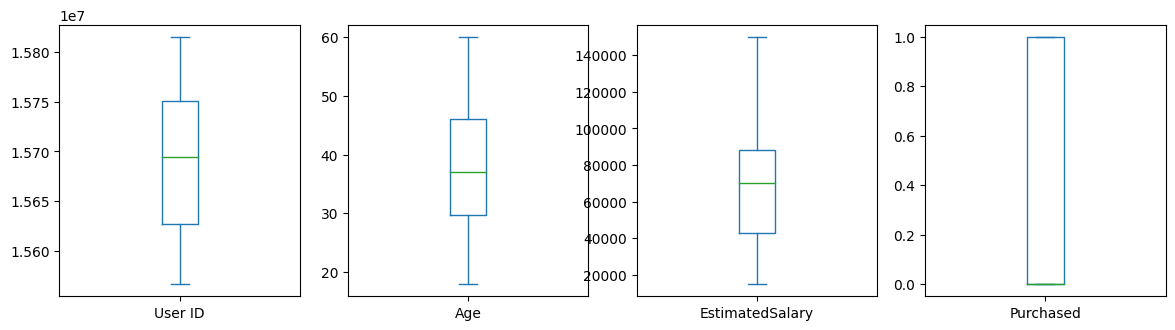

In [37]:
# checking for outliers
data.plot(kind='box', figsize= (18, 12), layout= (3, 5), sharex= False, subplots= True);

In [38]:
data = data.drop(columns = ['User ID', 'Gender'], axis = 1)
data

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [39]:
X = data.drop('Purchased', axis = 1)
y = data['Purchased']

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)

In [42]:
# Random Forest

rf_clf = RandomForestClassifier(n_estimators = 20, max_depth = 20, criterion = 'entropy', min_samples_split = 3)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_split=3,
                       n_estimators=20)

In [43]:
y_rf_pred = rf_clf.predict(X_test)
print(confusion_matrix(y_test, y_rf_pred ))

[[47  5]
 [ 2 26]]


In [44]:
print('Accuracy is: ',accuracy_score(y_test, y_rf_pred ))

Accuracy is:  0.9125


In [45]:
# Decision Tree

dt_clf = DecisionTreeClassifier(random_state = 42)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [46]:
y_dt_pred = dt_clf.predict(X_test)
print(confusion_matrix(y_test, y_dt_pred))

[[46  6]
 [ 7 21]]


In [47]:
print('Accuracy is: ',accuracy_score(y_test, y_dt_pred))

Accuracy is:  0.8375


In [48]:
# Logistic Regression

log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [49]:
y_log_pred = log_reg.predict(X_test)
confusion_matrix(y_test, y_log_pred)

array([[52,  0],
       [28,  0]])

In [50]:
print('Accuracy :',accuracy_score(y_test, y_log_pred))

Accuracy : 0.65


In [51]:
# KNN

metric_k = []
neighbors = np.arange(3,15)

for k in neighbors:
  knn = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski',p=2)
  knn.fit(X_train,y_train)
  y_knn_pred = knn.predict(X_test)
  accuracy = accuracy_score(y_test,  y_knn_pred)
  metric_k.append(accuracy)

Text(0, 0.5, 'accuracy')

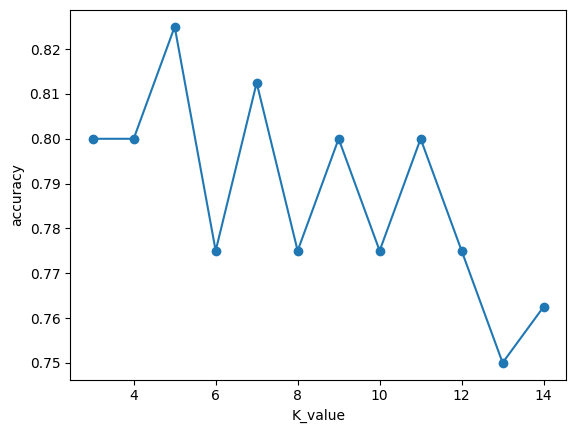

In [52]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('K_value')
plt.ylabel('accuracy')

In [55]:
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski',p=2)
knn.fit(X_train,y_train)
y_knn_pred = knn.predict(X_test)
print('Accuracy :',accuracy_score(y_test, y_knn_pred))

Accuracy : 0.825


In [27]:
# SVM model

svm = SVC(kernel = 'linear')
svm_clf = svm.fit(X_train,y_train)

In [28]:
y_svm_pred = svm.predict(X_test)
print(confusion_matrix(y_test, y_svm_pred))

[[48  4]
 [ 8 20]]


In [29]:
print('Accuracy is: ',accuracy_score(y_test, y_svm_pred))

Accuracy is:  0.85


In [56]:
models = pd.DataFrame({
    'Model': ['random_forest', 'decision_tree', 'log_reg', 'KNN', 'svm'],

    'Score': [accuracy_score(y_test, y_rf_pred), accuracy_score(y_test, y_dt_pred), accuracy_score(y_test, y_log_pred),
              accuracy_score(y_test, y_knn_pred), accuracy_score(y_test, y_svm_pred)]})

models.sort_values(by='Score',ascending=False)

,Model,Score
0,random_forest,0.9125
4,svm,0.8500
1,decision_tree,0.8375
3,KNN,0.8250
2,log_reg,0.6500


In [57]:
import pickle

with open('rf_clf_model.pkl', 'wb') as file:
    pickle.dump(rf_clf, file)